In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sum of Rewards

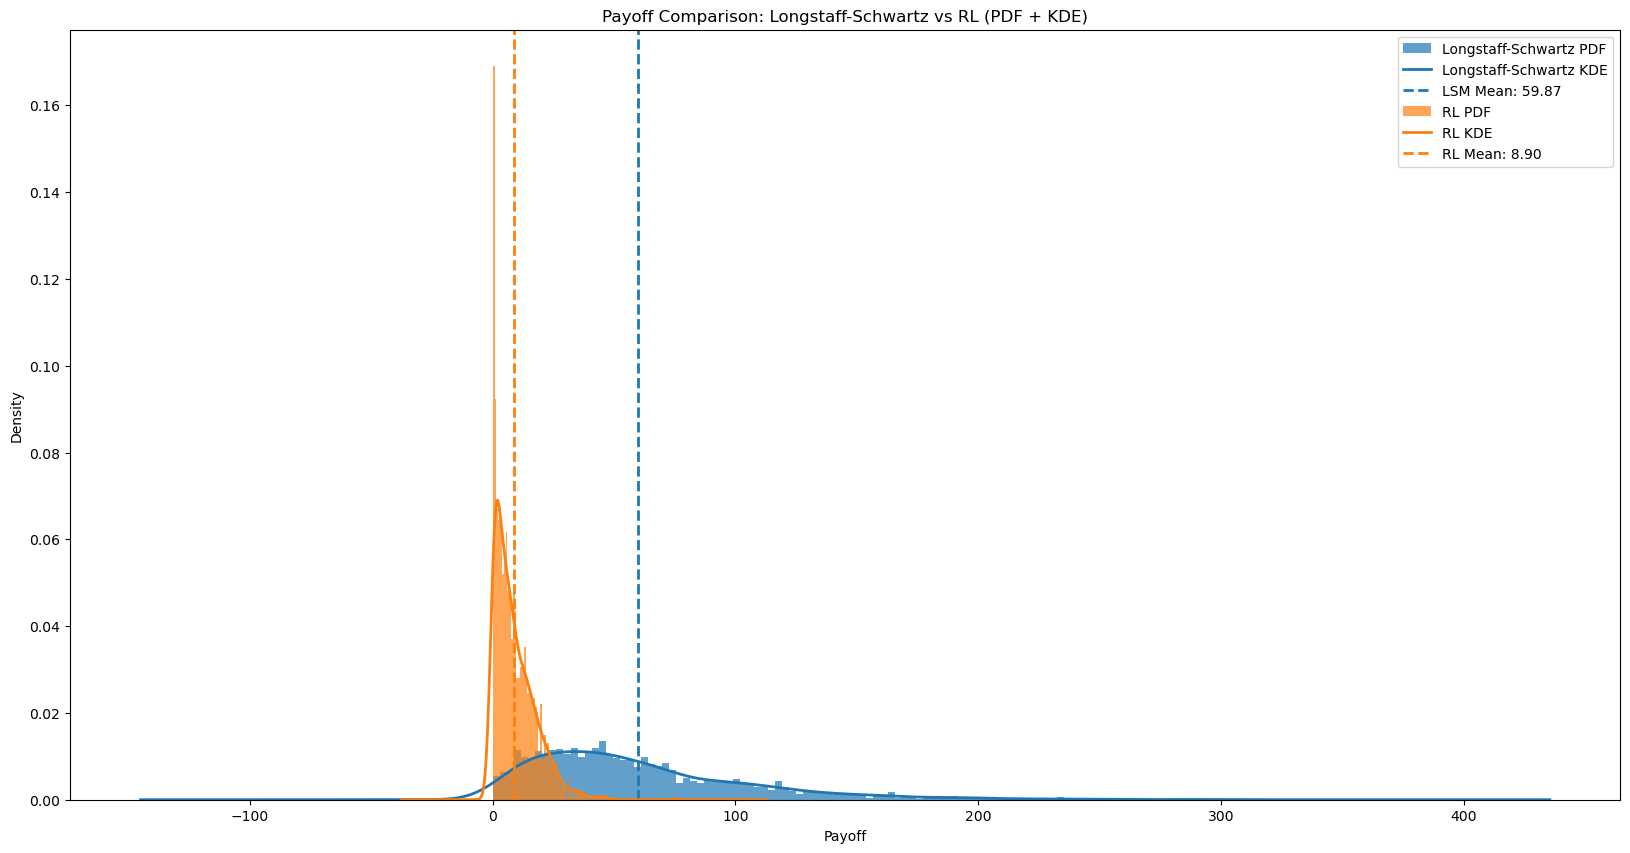

Longstaff-Schwartz Mean Payoff: 59.87
RL Mean Payoff: 8.90


In [6]:
# for the LSM 
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/Yearly_Swing_NRights35/evaluation_runs/longstaff_schwartz_solution.csv')

# Get the payoff data
lsm_payoffs = lsm.groupby('episode_idx')['reward'].sum()

# Create the plot with PDF (density=True) and KDE
fig, ax = plt.subplots(figsize=(20, 10))

# Plot histogram as PDF for LSM
ax.hist(lsm_payoffs, bins=100, density=True, alpha=0.7, color='tab:blue', label='Longstaff-Schwartz PDF')

# Add KDE for LSM
lsm_payoffs.plot.kde(ax=ax, color='tab:blue', linewidth=2, linestyle='-', label='Longstaff-Schwartz KDE')

# Add vertical line for LSM mean
lsm_mean = lsm_payoffs.mean()
ax.axvline(lsm_mean, color='tab:blue', linestyle='--', linewidth=2, label=f'LSM Mean: {lsm_mean:.2f}')

# for the RL
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/Yearly_Swing_NRights35/evaluation_runs/eval_run_8192.csv')

# Get the payoff data
rl_payoffs = rl.groupby('episode_idx')['reward'].sum()

# Plot histogram as PDF for RL
ax.hist(rl_payoffs, bins=100, density=True, alpha=0.7, color='tab:orange', label='RL PDF')

# Add KDE for RL
rl_payoffs.plot.kde(ax=ax, color='tab:orange', linewidth=2, linestyle='-', label='RL KDE')

# Add vertical line for RL mean
rl_mean = rl_payoffs.mean()
ax.axvline(rl_mean, color='tab:orange', linestyle='--', linewidth=2, label=f'RL Mean: {rl_mean:.2f}')

plt.title('Payoff Comparison: Longstaff-Schwartz vs RL (PDF + KDE)')
plt.legend()
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.show()

# Print the mean of each method
print(f"Longstaff-Schwartz Mean Payoff: {lsm_mean:.2f}")
print(f"RL Mean Payoff: {rl_mean:.2f}")


In [7]:
lsm.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,2048.0,2048.000000,2048.000000,2048.000000,2048.0,2048.000000,2048.000000,2048.000000
mean,66795.0,396.340691,-14447.257324,27257.257324,183.0,147.575684,147.575684,59.870371
std,0.0,72.433006,12336.146519,12336.146519,0.0,61.322218,61.322218,44.955121
min,66795.0,205.115200,-46279.000000,421.000000,183.0,2.000000,2.000000,0.094978
25%,66795.0,346.328275,-23597.500000,17711.000000,183.0,105.000000,105.000000,27.138011
50%,66795.0,388.938500,-14763.500000,27573.500000,183.0,145.000000,145.000000,48.993702
75%,66795.0,439.776650,-4901.000000,36407.500000,183.0,192.000000,192.000000,80.658862
max,66795.0,687.617100,12389.000000,59089.000000,183.0,319.000000,319.000000,290.375203


In [8]:
# for the RL
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing_new/evaluation_runs/eval_run_4096.csv')

rl['payoff'] = (rl['spot'] - 100) * rl['q_actual']
rl['payoff'] = np.maximum(rl['spot'] - 100, 0) * rl['q_actual']

# ax = rl.groupby('episode_idx')['payoff'].sum().plot(kind='hist', bins=100,
#                                              figsize=(20, 10), title='Payoff per Path for RL Method',
#                                              color='tab:orange', alpha=0.7)

# # Add vertical line for RL mean
# rl_mean = rl.groupby('episode_idx')['payoff'].sum().mean()
# ax.axvline(rl_mean, color='tab:orange', linestyle='--', linewidth=2, label=f'RL Mean: {rl_mean:.2f}')

# plt.legend(['RL', f'RL Mean: {rl_mean:.2f}'])
# plt.xlabel('Payoff')
# plt.ylabel('Frequency')
# plt.show()

rl.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,7900.967285,129.060037,2291.814909,2045.553256,102.278282,35.477804,34.999994,8.898413
std,2878.937068,20.616818,482.180932,440.798784,16.064596,0.269373,0.000266,8.292874
min,1128.000000,57.159800,900.852300,778.815900,44.909500,35.000696,34.999000,0.000000
25%,5886.000000,115.930250,1978.947075,1752.806625,92.873800,35.253351,34.999800,2.380517
50%,7875.000000,129.424200,2334.290100,2061.349100,104.424600,35.478504,35.000000,6.686305
75%,9870.000000,143.364500,2638.271650,2341.315275,113.958900,35.699959,35.000200,13.352972
max,20910.000000,190.697200,3849.999200,3846.915100,147.712300,35.999815,35.000900,75.133070


# More Advanced Analysis

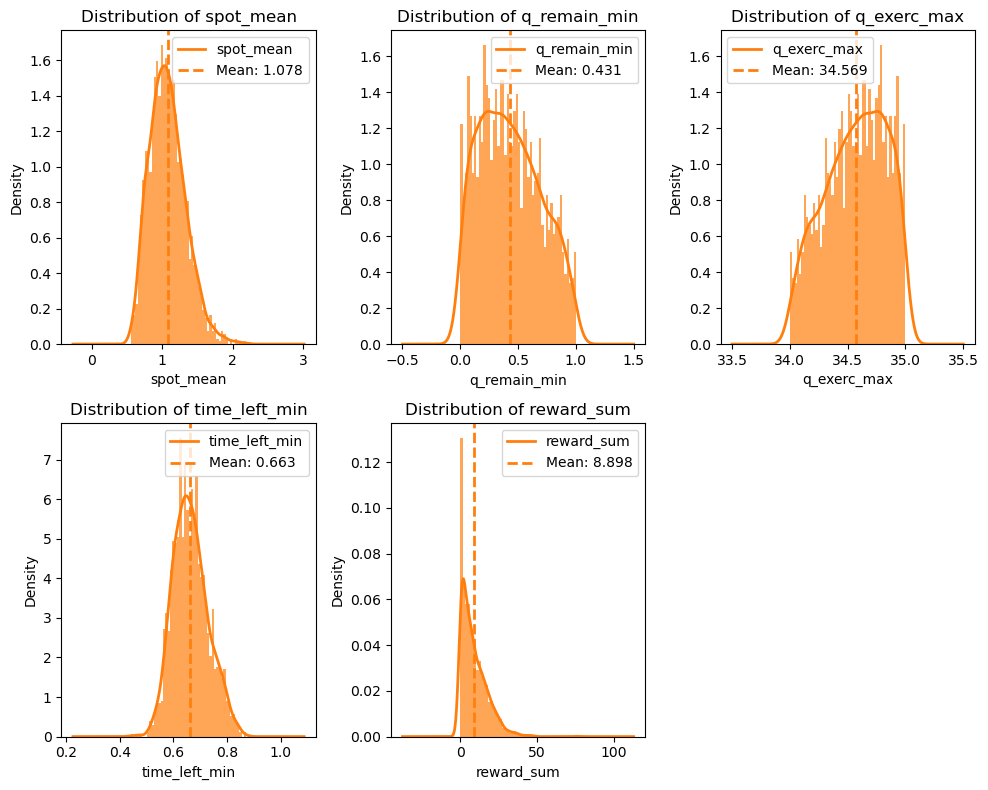

,spot_mean,q_remain_min,q_exerc_max,time_left_min,reward_sum
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1.077525,0.430618,34.569382,0.663221,8.898413
std,0.252840,0.261184,0.261184,0.065341,8.292874
min,0.554734,0.000200,34.000700,0.441100,0.000000
25%,0.896611,0.213300,34.374975,0.616400,2.380517
50%,1.055417,0.406800,34.593200,0.657500,6.686305
75%,1.233943,0.625025,34.786700,0.704100,13.352972
max,2.192649,0.999300,34.999800,0.871200,75.133070


In [21]:
rl_agg = rl.groupby('episode_idx').agg({'spot': 'mean', 'q_remain': 'min', 'q_exerc': 'max', 'time_left':'min', 'reward': 'sum'})
rl_agg.columns = [f'{col}_{agg}' for col, agg in zip(rl_agg.columns, ['mean', 'min', 'max', 'min', 'sum'])]

# Create subplots for each metric
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

# List of metrics to plot
metrics = ['spot_mean', 'q_remain_min', 'q_exerc_max', 'time_left_min', 'reward_sum']

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Plot histogram as PDF
    ax.hist(rl_agg[metric], bins=50, density=True, alpha=0.7, color='tab:orange')
    
    # Add KDE
    rl_agg[metric].plot.kde(ax=ax, color='tab:orange', linewidth=2)
    
    # Add vertical line for mean
    mean_val = rl_agg[metric].mean()
    ax.axvline(mean_val, color='tab:orange', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.3f}')
    
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Remove the last empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

rl_agg.describe()

In [ ]:
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/Yearly_Swing_NRights35/evaluation_runs/longstaff_schwartz_solution.csv')
rl_agg = rl.groupby('episode_idx').agg({'spot': 'mean', 'q_remain': 'min', 'q_exerc': 'max', 'time_left':'min', 'reward': 'sum'})
rl_agg.columns = [f'{col}_{agg}' for col, agg in zip(rl_agg.columns, ['mean', 'min', 'max', 'min', 'sum'])]συνάντηση
rl_agg.describe()

,spot_mean,q_remain_min,q_exerc_max,time_left_min,reward_sum
count,2048.000000,2048.000000,2048.000000,2048.0,2048.000000
mean,1.082898,-112.575684,147.575684,0.0,59.870371
std,0.197904,61.322218,61.322218,0.0,44.955121
min,0.560424,-284.000000,2.000000,0.0,0.094978
25%,0.946252,-157.000000,105.000000,0.0,27.138011
50%,1.062673,-110.000000,145.000000,0.0,48.993702
75%,1.201576,-70.000000,192.000000,0.0,80.658862
max,1.878735,33.000000,319.000000,0.0,290.375203
